# Install required Packages

In [1]:
#pip install requests

In [2]:
#pip install matplotlib

In [3]:
#pip install pandas

In [4]:
#pip install numpy

# Import Required packages

In [5]:
import os

In [6]:
import time

In [7]:
import random

In [8]:
import threading

In [9]:
import requests

In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
from pathlib import Path

In [14]:
from IPython.display import clear_output

# Get Data

In [15]:
def get_data():
    url = "http://127.0.0.1:5091/ngsi-ld/v1/entities/Node-1"
    response = requests.request("GET", url)
    return response.text

# Generate a dataframe from the data

In [16]:
def generate_dataframe():
    _data_from_warehouse = eval(get_data())
    _data_results = _data_from_warehouse["results"]
    df = pd.DataFrame.from_dict(_data_results)
    return df

# Convert the data in dataframe to correct format

In [17]:
def handle_datatypes():
    df = generate_dataframe()
    _columns = list(df.columns)
    for column in _columns:
        if column == "node_id":
            continue
        df[column] = df[column].astype('float')
    return df

# Plot the graphs

In [18]:
def plot_graphs():
    global color
    df = handle_datatypes()
    fig = plt.figure(figsize=(16,48))
    _columns = list(df.columns)
    for i in range(2, len(_columns)):
        plot_id = 921 + i
        ax = fig.add_subplot(plot_id)
        _current_column = _columns[i]
        _temp_list = df[_current_column].tolist()
        
        try:
            _temp_list_new = _temp_list[0:120]
        except:
            _temp_list_new = _temp_list
        if color.get(_current_column) is None:
            r = random.random()
            b = random.random()
            g = random.random()
            color[_current_column] = (r, g, b)
            
        
        ax.plot(_temp_list_new, label=_current_column, color=color[_current_column])
        ax.ylabel = _current_column
        ax.set_title(_current_column)
        #ax.legend()
    plt.legend()
    plt.show()

In [19]:
def live():
    while True:
        time.sleep(1)
        clear_output(wait=True)
        try:
            plot_graphs()
        except Exception as _visual_exception:
            print(_visual_exception)
            pass

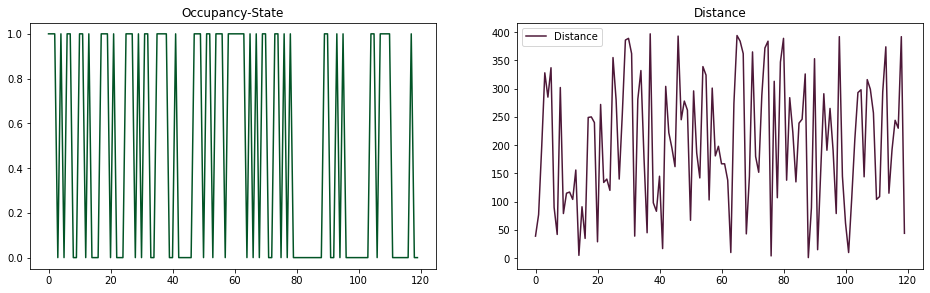

In [ ]:
global color
color = {}
live()